In [34]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, concatenate
from tensorflow.keras import Input

seq_model = Sequential()
seq_model.add(Dense(32, activation='relu',input_shape=(64,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))

seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


## 함수형 api

In [35]:

input_tensor = Input(shape=(64,))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(input_tensor,output_tensor)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


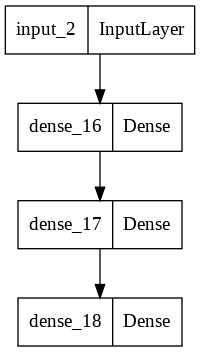

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model)

 - MNIST 이미지 데이터 로드하고 벡터로 재구성
 - 데이터에 모델을 맞추고
 - 테스트 데이터에서 모델 평가 

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [38]:
inputs = keras.Input(shape=(784,),name='digits')
x = Dense(64, activation='relu', name='dense_1')(inputs)
x = Dense(64, activation='relu', name='dense_2')(x)
outputs = Dense(10,activation='softmax',name='predictions')(x)

model = Model(inputs=inputs, outputs=outputs)

In [39]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


CategoricalCrossentropy vs SparseCategoricalCrossentropy
- 훈련 데이터의 label(target)이 one-hot vector 이면 CategoricalCrossentropy
- 훈련 데이터의 label(target)이 정수이면 SparseCategoricalCrossentropy


## 훈련 구성

In [40]:
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

## 학습

In [41]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_val,y_val)
)

Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.3455 - sparse_categorical_accuracy: 0.9022 - val_loss: 0.1797 - val_sparse_categorical_accuracy: 0.9484
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1393 - val_sparse_categorical_accuracy: 0.9583


## 평가

In [42]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1500 - sparse_categorical_accuracy: 0.9545


## 다중 입력모델

In [43]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,),
                   dtype='int32',
                   name='text')
embedded_text = Embedding(
    text_vocabulary_size,64)(text_input)

encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None,),
                       dtype = 'int32',
                       name='question')
embedded_question = Embedding(
    question_vocabulary_size,32)(question_input)
encoded_question = LSTM(16)(embedded_question)

concatenated = concatenate([encoded_text, encoded_question], axis=-1)
# axis = -1은 가장 낮은 차원 뒤쪽에서부터 시작. 자료가 2차원이고 axis=-1이면 1차원에서 붙이라는 의미

answer = Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input,question_input], answer)
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[과제] 입력이 2개인 모델에 대하여 훈련을 수행하세요.
 - num_samples = 1000, max_length= 100

In [45]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples=1000
max_length=100

text = np.random.randint(1, text_vocabulary_size,
                         size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,
                             size=(num_samples, max_length))

answers = np.random.randint(0, answer_vocabulary_size,
                              size=num_samples)

answers = to_categorical(answers)

model.fit([text,question], answers, epochs=10, batch_size=128)

model.fit({'text':text, 'question':question}, answers, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 3s 16ms/step - loss: 6.2146 - acc: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 6.1991 - acc: 0.0650
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 6.1690 - acc: 0.0260
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 6.0957 - acc: 0.0120
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 5.9905 - acc: 0.0130
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 5.8788 - acc: 0.0080
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 5.7782 - acc: 0.0110
Epoch 8/10
8/8 [==============================] - 0s 13ms/step - loss: 5.6954 - acc: 0.0190
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 5.6122 - acc: 0.0280
Epoch 10/10
8/8 [==============================] - 0s 13ms/step - loss: 5.5501 - acc: 0.0330
Epoch 1/10
8/8 [==============================] - 2s 17ms/step - loss: 5.4804 -

## 다중모델 출력
 - 소셜 미디어에서 익명 사용자의 포스트를 입력을 받아 그 사람의 나이, 성별, 소득수준등을 예측

In [55]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = Embedding(vocabulary_size,256)(posts_input)
x = Conv1D(128,5,activation='relu')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1,name='age')(x)
income_prediction = Dense(num_income_groups,activation='softmax',name='income')(x)
gender_prediction = Dense(1, activation='sigmoid',name='gender')(x)

model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])

model.compile(optimizer = 'rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

In [56]:
model.compile(optimizer = 'rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

model.compile(optimizer = 'rmsprop',
              loss={'age':'mse',
                    'income':'categorical_crossentropy',
                    'gender':'binary_crossentropy'}) # 위와 동일(출력 층에 이름을 지정했을 때만 사용 가능)

In [57]:
model.compile(optimizer = 'rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1., 10.])

model.compile(optimizer = 'rmsprop',
              loss={'age':'mse',
                    'income':'categorical_crossentropy',
                    'gender':'binary_crossentropy'},
              loss_weights={'age':0.25,
                            'income':1.,
                            'gender':10.}) # 위와 동일(출력 층에 이름을 지정했을 때만 사용 가능)

In [60]:
model.fit(posts, [age_targets, income_targets, gender_targets],
          epochs=10, batch_size=64) # 위 3개가 넘파이 배열이라고 가정

model.fit(posts, {'age' : age_targets, 
                  'incomde' : income_targets, 
                  'gender' : gender_targets},
          epochs=10, batch_size=64) # 위와 동일(출력 층에 이름을 지정했을 때만 사용 가능)

NameError: ignored